In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



from utilities import visualize_classifier

In [14]:
# Входной файл, содержащий данные
input_file = 'data_multivar_nb.txt'


In [15]:
# Загрузка данных из входного файла
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1] 

In [16]:
# Создание наивного байесовского классификатора
classifier = GaussianNB()


In [17]:
# Тренировка классификатора
classifier.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
# Прогнозирование значений дпя тренировочных данных
y_pred = classifier.predict(X)

In [19]:
# Вычисление качества классификатора
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

Accuracy of Naive Bayes classifier = 99.75 %


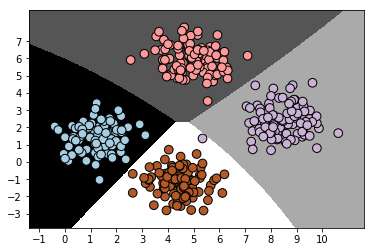

In [20]:

# Визуализация результатов работы классификатора
visualize_classifier(classifier, X, y)


In [37]:
# Разбивка данных на обучающий и тестовый наборы

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

In [ ]:
# Вычисление качества классификатора
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

Accuracy of the new classifier = 100.0 %


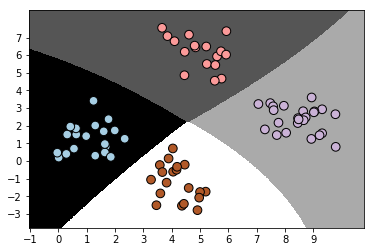

In [39]:
# Визуализация работы классификатора
visualize_classifier(classifier_new, X_test, y_test)


In [47]:
num_folds = 3
accuracy_values = cross_val_score(classifier, 
        X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

precision_values = cross_val_score(classifier, 
        X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

recall_values = cross_val_score(classifier, 
        X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")

f1_values = cross_val_score(classifier, 
        X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%
